In [25]:
import numpy as np
import pandas as pd
import utilities as utl


In [26]:
reactants = np.array([["C2H5OH(l, ethanol)", -1], ["O2(g)", -3]])
products = np.array([["H2O(l)", 3], ["CO2(g)", 2]])

In [27]:
dG_f0, dH_f0, dS0, vi, r_298K, p_298K = utl.standard_properties(reactants, products)


Reactants Properties
                Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
58   C2H5OH(l, ethanol)       -277.69      160.700       -174.78          1.0   
142               O2(g)          0.00      205.138          0.00          3.0   

     Weighted_DHf  Weighted_DGf  Weighted_S  
58        -277.69       -174.78     160.700  
142          0.00          0.00     615.414  


Products Properties
   Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
63  CO2(g)      -393.509       213.74      -394.359          2.0   
89  H2O(l)      -285.830        69.91      -237.129          3.0   

    Weighted_DHf  Weighted_DGf  Weighted_S  
63      -787.018      -788.718      427.48  
89      -857.490      -711.387      209.73  


ΔGº: -1325.325 [kJ/mol], and it is spontaneous.
ΔHº: -1366.818 [kJ/mol], and it is exothermic.
ΔSº: 0.13916820392419904 [J/K·mol], and the disorder decreases.
v_i: 1.0


In [28]:
temperatures = np.array([350, 500, 600, 800, 1000, 1200, 1500])
results = utl.properties_temperature(temperatures, dG_f0, dS0)

   T (K)  ΔGº (kJ/mol)      ln(Ka)             Ka
0    350  -1374.033871  472.192815  1.176884e+205
1    500  -1394.909102  335.556676  5.375424e+145
2    600  -1408.825922  282.420400  4.504237e+122
3    800  -1436.659563  216.000055   6.421431e+93
4   1000  -1464.493204  176.147847   3.162556e+76
5   1200  -1492.326845  149.579709   9.154664e+64
6   1500  -1534.077306  123.011571   2.650005e+53


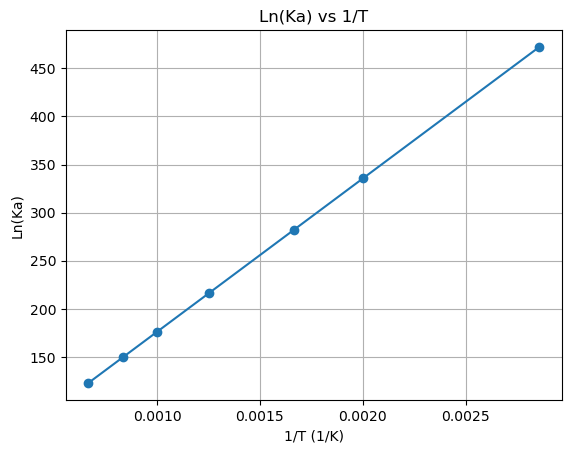

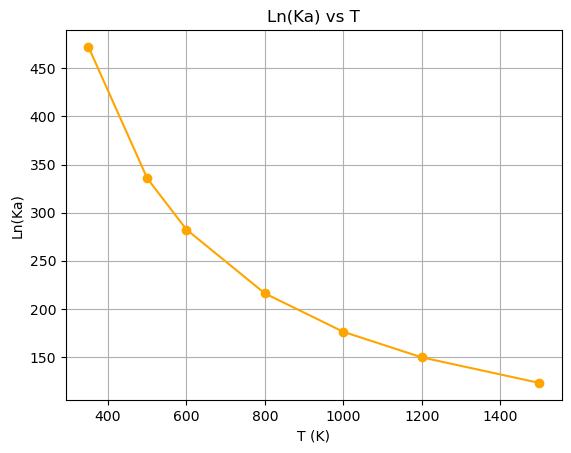

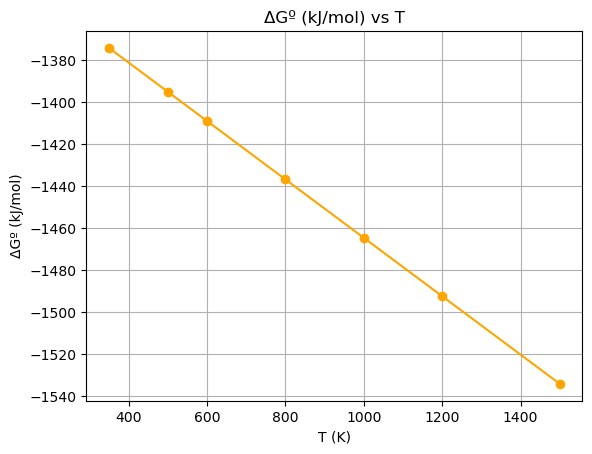

In [29]:
utl.graphs(results)